In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.cluster import KMeans,AgglomerativeClustering
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.cluster.hierarchy import dendrogram,linkage
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df = df.dropna()

df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes

scaler = pp.StandardScaler()
columnsToScale = ['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)','Energy_Recovered (in GWh)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)','CO2_Emissions (in MT)','Year']
df[columnsToScale] = scaler.fit_transform(df[columnsToScale])
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,-0.753796,1.376167,0.193880,-0.619764,1.543328,-0.697051,-1.356325,1.079423,37078.88,0.561742,42.22,20972.96
1,147,-1.449340,-1.403578,-1.153098,1.028744,0.124915,1.618760,-1.284276,0.700701,33128.20,-0.756197,137.25,34850.41
2,136,1.158950,-1.330788,-0.668076,1.142400,0.123888,1.560644,1.718910,-1.493780,18803.46,0.667825,124.47,57773.15
3,38,1.506722,1.494394,-1.009403,0.431675,0.809131,-0.785350,-1.106232,-0.716061,9182.27,-1.556310,67.80,21837.51
4,46,-0.232138,-0.021926,0.262567,1.138106,0.882681,-1.499375,-0.689181,0.502825,39235.12,0.612087,186.52,41379.37


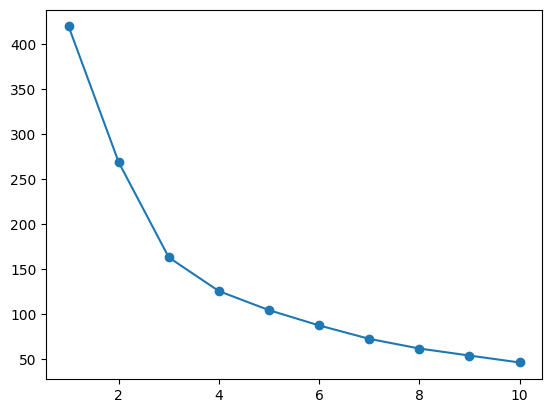

In [3]:
x = df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Energy_Recovered (in GWh)']]
pca = PCA(n_components=2,random_state=42)
x = pca.fit_transform(x)

inertias = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42,n_init=10)
  kmeans.fit(x)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias,marker='o')
plt.show()

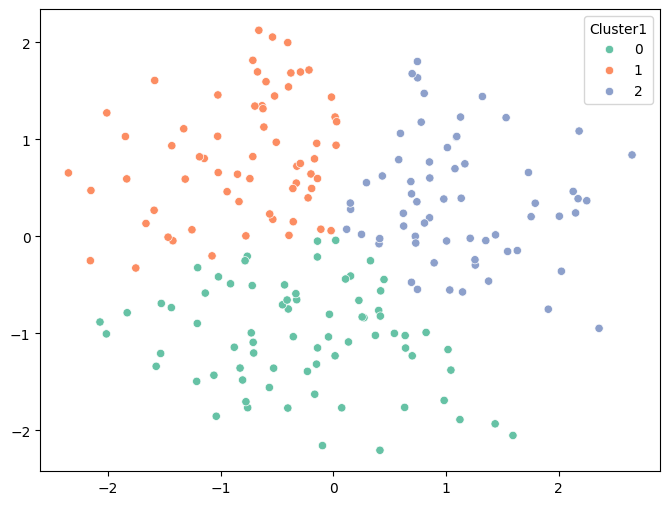

            Country      Year  Air_Pollution_Index  Water_Pollution_Index  \
Cluster1                                                                    
0         83.301370 -0.079690            -0.992265               0.151216   
1         96.015625 -0.074554             0.447251               0.352050   
2         87.126984  0.168076             0.695417              -0.532856   

          Soil_Pollution_Index  Industrial_Waste (in tons)  \
Cluster1                                                     
0                    -0.132073                   -0.075473   
1                    -0.470568                    0.197465   
2                     0.631075                   -0.113146   

          Energy_Recovered (in GWh)  CO2_Emissions (in MT)  \
Cluster1                                                     
0                          0.365184               0.104209   
1                         -0.886551              -0.020273   
2                          0.477473              -0.100

In [4]:
# Looks like 3 is best point
kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)
df['Cluster1'] = kmeans.fit_predict(x)

plt.figure(figsize=(8,6))
sb.scatterplot(x=x[:,0],y=x[:,1],hue=df['Cluster1'],palette='Set2')
plt.show()
cluster_summary = df.groupby('Cluster1').mean(numeric_only=True)
print(cluster_summary)

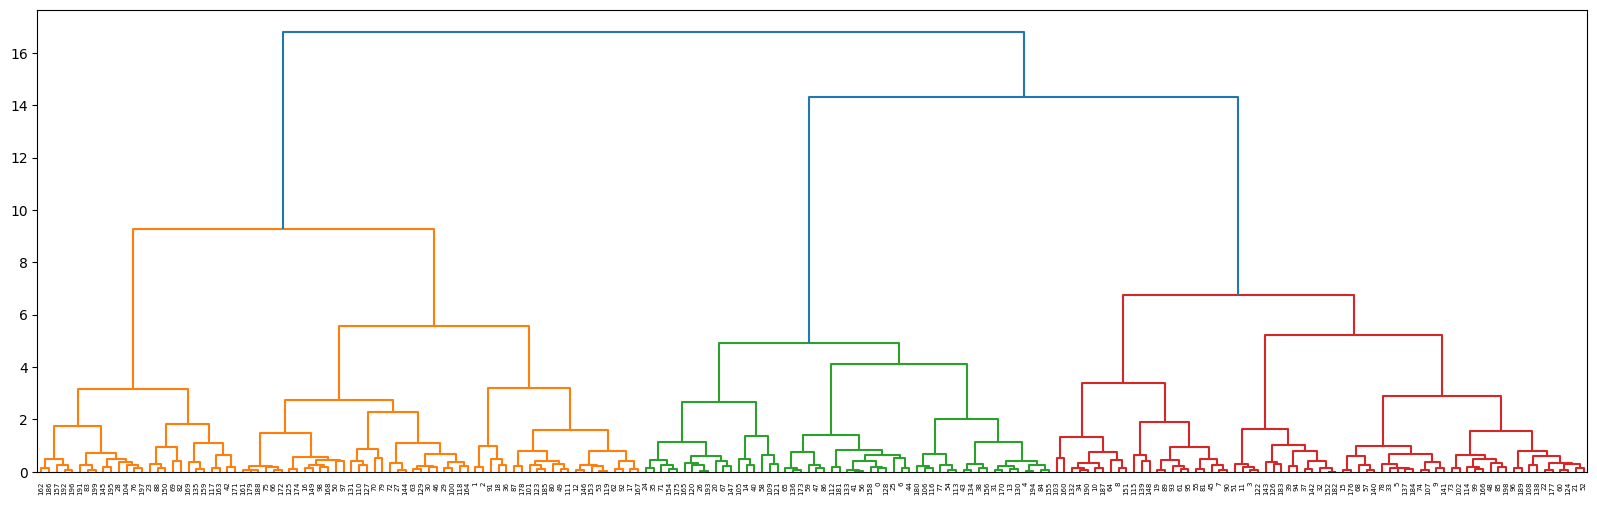

In [5]:
data = linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(20,6))
dendrogram(data)
plt.show()

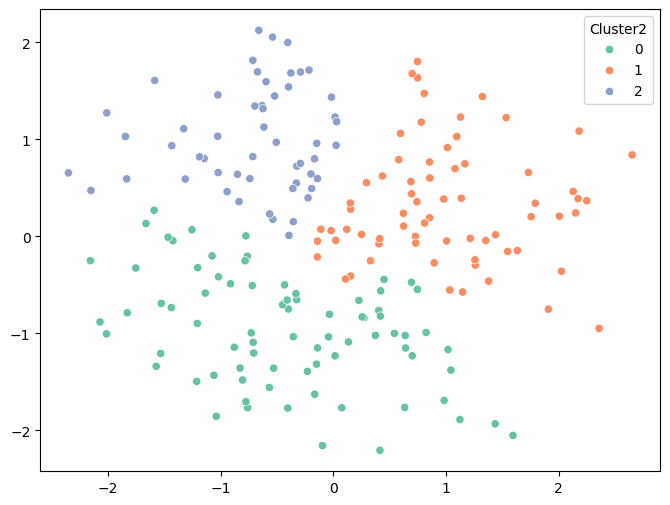

            Country      Year  Air_Pollution_Index  Water_Pollution_Index  \
Cluster2                                                                    
0         85.410256  0.008627            -1.002775               0.073111   
1         84.217391  0.087913             0.622709              -0.405134   
2         98.905660 -0.127150             0.665085               0.419841   

          Soil_Pollution_Index  Industrial_Waste (in tons)  \
Cluster2                                                     
0                    -0.247978                   -0.072826   
1                     0.618355                   -0.099238   
2                    -0.440079                    0.236374   

          Energy_Recovered (in GWh)  CO2_Emissions (in MT)  \
Cluster2                                                     
0                          0.192976              -0.002062   
1                          0.431498              -0.043875   
2                         -0.845763               0.060

In [6]:
a_clustering = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
df['Cluster2'] = a_clustering.fit_predict(x)
plt.figure(figsize=(8,6))
sb.scatterplot(x=x[:,0],y=x[:,1],hue=df['Cluster2'],palette='Set2')
plt.show()
cluster_summary = df.groupby('Cluster2').mean(numeric_only=True)
print(cluster_summary)

# Summary of Phase 2
In this assignment KMeans and Agglomerative clustering is used to cluster the dataset based on Air, Water, Soil Pollution, Energy Recovered. For KMeans elbow method is used and ``3`` clusters have been made. For Agglomerative too ``3`` clusters is made. Since both of them have same k and hence same output. Clusters seem to have better definition and boundary.

In [7]:
x = df[['Air_Pollution_Index','CO2_Emissions (in MT)','Industrial_Waste (in tons)']]
y = df['Energy_Recovered (in GWh)']
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

In [8]:
model = keras.Sequential([
        keras.layers.Dense(1,activation='linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

model.fit(x_train,y_train,epochs=5)
y_pred1 = model.predict(x_test)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1173 - mae: 1.1949  
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1019 - mae: 1.1909 
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0875 - mae: 1.1871 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0733 - mae: 1.1834 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0593 - mae: 1.1796 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [9]:
print(r2_score(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))

-0.2782563634169559
1.4348896185550786
0.965008335443011


In [10]:
model = keras.Sequential([
        keras.layers.Dense(64,activation='linear'),
        keras.layers.Dense(32,activation='linear'),
        keras.layers.Dense(1,activation='linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

model.fit(x_train,y_train,epochs=5)
y_pred2 = model.predict(x_test)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0228 - mae: 0.8637
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0106 - mae: 0.8679 
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0065 - mae: 0.8703 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0033 - mae: 0.8664 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0012 - mae: 0.8630 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [11]:
print(r2_score(y_test,y_pred2))
print(mean_squared_error(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))

-0.03851352484355042
1.165769495208042
0.9739286365497499


# Phase 3
In this model, neural networking is used to predict energy recovered using Air pollution, CO2 emission and Industrial waste. Scores obtained using this model is not constant. In one of the run, scores are;

## One Layer Model
1. R2 Score: -0.8136810601234508
2. MSE: 2.0359234649804114
3. MAE: 1.1309736503066619

## Multilayer Model
1. R2 Score: -0.0018310349122709901
2. MSE: 1.124592055774498
3. MAE: 0.9558614458845802

On an average, simple model's scores are worse than linear model and multilayer model's scores are better than linear model. As expected for most of the time, multilayer model is more better than single layer model. Some of the runs having scores that are against these summary can be found.